In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
pd.options.mode.chained_assignment = None
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
workTable = pd.read_csv('workTable.csv')

In [3]:
workTable.head()

,Unnamed: 0,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
0,46,joinville,58.652928,18054.0,15045.00000,297.782896,256.508935
1,47,joinville,148.766748,45000.0,38160.00000,297.782896,256.508935
2,48,joinville,17.855129,5000.0,4580.00000,297.782896,256.508935
3,49,joinville,120.552592,35898.5,30922.81693,297.782896,256.508935
4,50,joinville,14.619374,4375.0,3750.00000,297.782896,256.508935


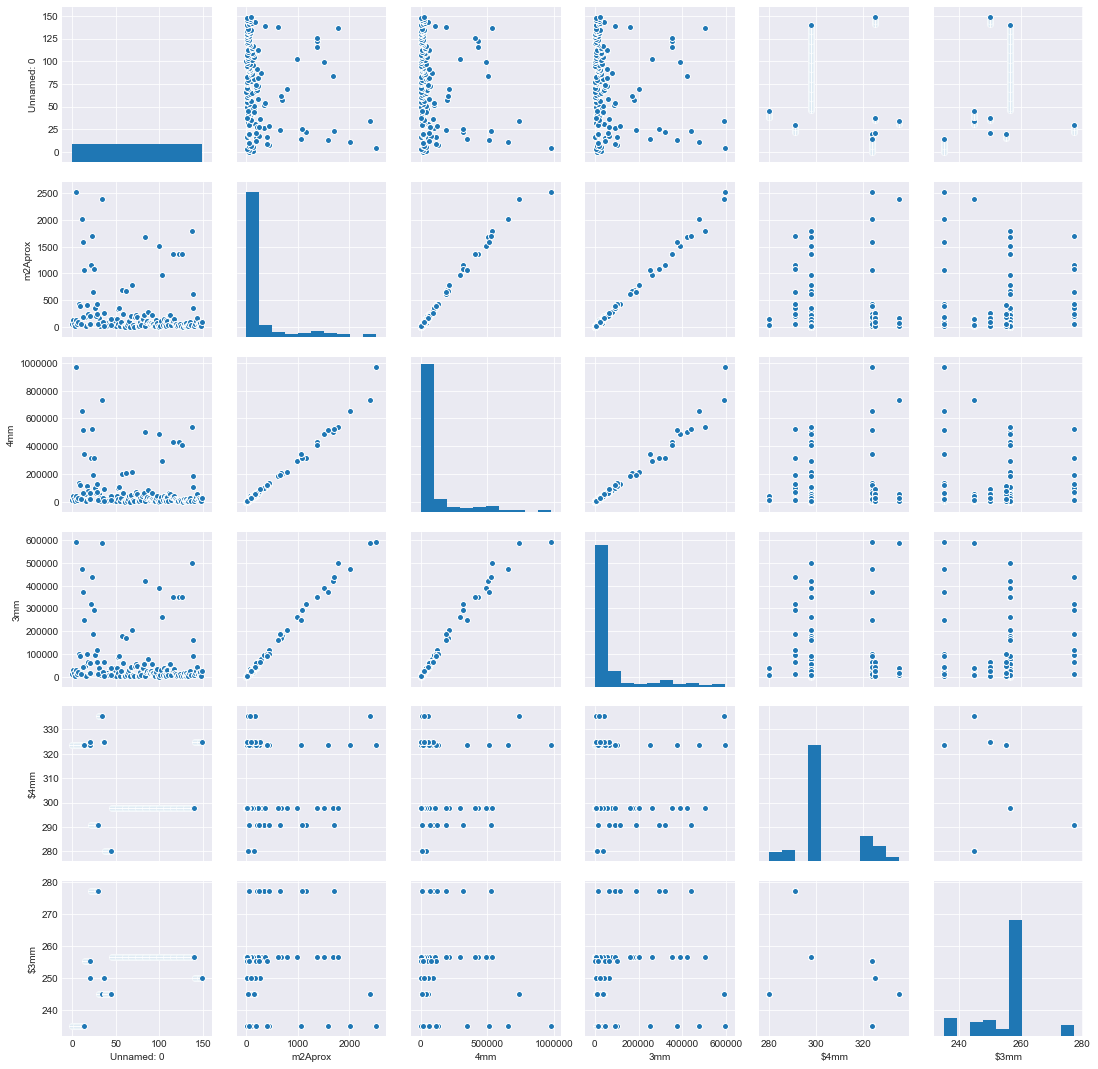

In [4]:
sns.pairplot(workTable) 

In [5]:
#joinville
jllework = workTable.loc[(workTable['cidade'] == 'joinville')]
display((jllework['4mm'] / jllework['m2Aprox']).mean(),jllework['$4mm'].mean())
display((jllework['3mm'] / jllework['m2Aprox']).mean(),jllework['$3mm'].mean())
jllework.loc[jllework['cidade'] == 'joinville', 'cidade'] = 1

298.9234609987093

297.7828962797693

259.0144936807729

256.5089345364358

In [6]:
#florianopolis
florianopoliswork = workTable.loc[(workTable['cidade'] == 'florianopolis')]
display((florianopoliswork['4mm'] / florianopoliswork['m2Aprox']).mean(), florianopoliswork['$4mm'].mean())
display((florianopoliswork['3mm'] / florianopoliswork['m2Aprox']).mean(), florianopoliswork['$3mm'].mean())
florianopoliswork.loc[florianopoliswork['cidade'] == 'florianopolis', 'cidade'] = 2

335.3263888888889

335.3263888888889

245.00000000000003

245.0

In [7]:
#Curtiba
curitibawork = workTable.loc[(workTable['cidade'] == 'curitiba')]
display((curitibawork['3mm'] / curitibawork['m2Aprox']).mean())
display((curitibawork['4mm'] / curitibawork['m2Aprox']).mean())
curitibawork.loc[curitibawork['cidade'] == 'curitiba', 'cidade'] = 3

277.13366089238883

290.8197346314565

In [8]:
#Jaragua
jaraguawork = workTable.loc[(workTable['cidade'] == 'jaragua')]
display((jaraguawork['4mm'] / jaraguawork['m2Aprox']).mean(), jaraguawork['$4mm'].mean())
display((jaraguawork['3mm'] / jaraguawork['m2Aprox']).mean(), jaraguawork['$3mm'].mean())
jaraguawork.loc[jaraguawork['cidade'] == 'jaragua', 'cidade'] = 4

280.0

280.0

242.97323128943643

245.0

In [9]:
#Balneario
balneariowork = workTable.loc[(workTable['cidade'] == 'balneario')]
display(((balneariowork['4mm'] / balneariowork['m2Aprox']).mean()), balneariowork['$4mm'].mean())
display(((balneariowork['3mm'] / balneariowork['m2Aprox']).mean()), balneariowork['$3mm'].mean())

display((((balneariowork['4mm'] / balneariowork['m2Aprox']).mean())+(balneariowork['$4mm'].mean()))/2)
display((((balneariowork['3mm'] / balneariowork['m2Aprox']).mean())+(balneariowork['$3mm'].mean()))/2)

balneariowork.loc[balneariowork['cidade'] == 'balneario', 'cidade'] = 5

323.75

323.75

241.31371396344727

235.0

323.75

238.15685698172365

In [10]:
#Blumenau#Blumenau
blumenauwork = workTable.loc[(workTable['cidade'] == 'blumenau')]
(((blumenauwork['4mm'] / blumenauwork['m2Aprox']).mean()), blumenauwork['$4mm'].mean())
(((blumenauwork['3mm'] / blumenauwork['m2Aprox']).mean()), blumenauwork['$3mm'].mean())

print('Média $/m² 4mm: \n',((((blumenauwork['4mm'] / blumenauwork['m2Aprox']).mean())+(blumenauwork['$4mm'].mean()))/2))
print('Média $/m² 3mm: \n', (((blumenauwork['3mm'] / blumenauwork['m2Aprox']).mean())+(blumenauwork['$3mm'].mean()))/2)
blumenauwork.loc[blumenauwork['cidade'] == 'blumenau', 'cidade'] = 6

Média $/m² 4mm: 
 317.1877747272363
Média $/m² 3mm: 
 255.33333333333331


In [11]:
#Outras/Demais cidades#Outras/D 
outraswork = workTable.loc[
            (workTable['cidade'] != 'jaragua') 
          & (workTable['cidade'] != 'joinville')
          & (workTable['cidade'] != 'blumenau')
          & (workTable['cidade'] != 'florianopolis')
          & (workTable['cidade'] != 'balneario')
          & (workTable['cidade'] != 'curitiba')]

(((outraswork['4mm'] / outraswork['m2Aprox']).mean()), outraswork['$4mm'].mean())
(((outraswork['3mm'] / outraswork['m2Aprox']).mean()), outraswork['$3mm'].mean())

print('Média $/m² 4mm: \n',((((outraswork['4mm'] / outraswork['m2Aprox']).mean())+(outraswork['$4mm'].mean()))/2))
print('Média $/m² 3mm: \n', (((outraswork['3mm'] / outraswork['m2Aprox']).mean())+(outraswork['$3mm'].mean()))/2)


outraswork.loc[outraswork['cidade'] != 0, 'cidade'] = 7

Média $/m² 4mm: 
 325.0
Média $/m² 3mm: 
 258.1843337353938


In [12]:
#Cidades fora de joinville
foreignerswork = workTable.loc[(workTable['cidade'] != 'joinville')]

(((foreignerswork['4mm'] / foreignerswork['m2Aprox']).mean()), foreignerswork['$4mm'].mean())
(((foreignerswork['3mm'] / foreignerswork['m2Aprox']).mean()), foreignerswork['$3mm'].mean())

print('Média $/m² 4mm: \n',((((foreignerswork['4mm'] / foreignerswork['m2Aprox']).mean())+(foreignerswork['$4mm'].mean()))/2))
print('Média $/m² 3mm: \n', (((foreignerswork['3mm'] / foreignerswork['m2Aprox']).mean())+(foreignerswork['$3mm'].mean()))/2)


foreignerswork.loc[foreignerswork['cidade'] != 0, 'cidade'] = 8

Média $/m² 4mm: 
 312.41926937458334
Média $/m² 3mm: 
 252.4880921177313


(63, 7) (63,)
Coefficients: 
 [ 6.67965140e-13 -3.33066907e-16  1.63950906e-12  1.00000000e+00
 -2.83106871e-15  2.65797893e-32  0.00000000e+00]
Mean squared error: 0.00
Variance score: 1.00


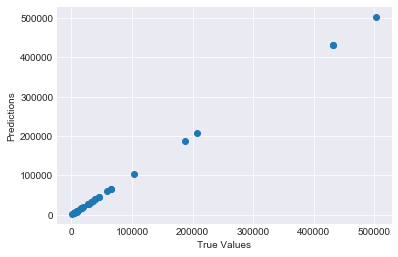

In [13]:
df_joinville = jllework
y = df_joinville['4mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_joinville, y, test_size=0.33)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')


# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))
 


(66, 7) (66,)
Coefficients: 
 [ 1.10320734e-13 -1.11022302e-16  1.20474377e-14 -5.55111512e-17
  1.00000000e+00  2.74386159e-32  0.00000000e+00]
Mean squared error: 0.00
Variance score: 1.00


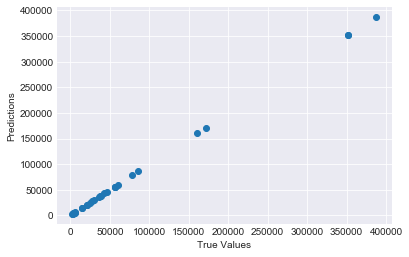

In [14]:
df_joinville = jllework
y = df_joinville['3mm'] # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_joinville, y, test_size=0.30)
print(X_train.shape, y_train.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))
 

